In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('cleaned_solar_energy_production_calgary.csv')

In [19]:
df.sample(11)

,name,installationDate,year,month,day,time_hour,time_min,kWh
100292,Whitehorn Multi-Service Centre,2016-12-13,2020,12,16,10,0,22.138
52138,Hillhurst Sunnyside Community Association,2016-09-25,2022,3,5,12,0,2.183
18956,Southland Leisure Centre,2015-09-01,2020,3,4,12,0,54.680
12142,Southland Leisure Centre,2015-09-01,2018,7,12,11,0,106.069
121346,City of Calgary North Corporate Warehouse,2016-12-21,2019,6,8,5,0,0.114
113375,City of Calgary North Corporate Warehouse,2016-12-21,2017,7,27,12,0,86.155
63137,Calgary Fire Hall Headquarters,2016-11-07,2018,10,12,9,0,2.673
229945,Manchester Building M,2017-10-23,2021,5,7,16,0,9.336
136759,City of Calgary North Corporate Warehouse,2016-12-21,2022,10,30,18,0,0.072
236949,Manchester Building M,2017-10-23,2022,10,17,17,0,3.177


In [4]:
df.info() # No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264379 entries, 0 to 264378
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              264379 non-null  object 
 1   installationDate  264379 non-null  object 
 2   year              264379 non-null  int64  
 3   month             264379 non-null  int64  
 4   day               264379 non-null  int64  
 5   time_hour         264379 non-null  int64  
 6   time_min          264379 non-null  int64  
 7   kWh               264379 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,264379.0,2019.696485,1.841050,2015.0,2018.000,2020.00,2021.0000,2023.000
month,264379.0,6.381785,3.049572,1.0,4.000,6.00,9.0000,12.000
day,264379.0,15.819479,8.791338,1.0,8.000,16.00,23.0000,31.000
time_hour,264379.0,12.909384,4.015890,0.0,10.000,13.00,16.0000,23.000
time_min,264379.0,0.147289,2.391195,0.0,0.000,0.00,0.0000,45.000
kWh,264379.0,38.041129,71.315762,0.0,1.392,8.11,36.0675,514.462


In [6]:
df.columns

Index(['name', 'installationDate', 'year', 'month', 'day', 'time_hour',
       'time_min', 'kWh'],
      dtype='object')

In [8]:
df[['name', 'kWh']].sample(10)

,name,kWh
203128,CFD Firehall #7,20.985
259803,Bearspaw Water Treatment Plant,419.410
147149,Richmond - Knob Hill Community Hall,1.130
261359,Bearspaw Water Treatment Plant,33.058
122341,City of Calgary North Corporate Warehouse,8.947
239747,Bearspaw Water Treatment Plant,0.279
105160,Whitehorn Multi-Service Centre,13.074
56974,Calgary Fire Hall Headquarters,2.180
53732,Hillhurst Sunnyside Community Association,15.696
259533,Bearspaw Water Treatment Plant,352.069


In [9]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [15]:
df[categorical_features].sample(11)

,name,installationDate
189902,Glenmore Water Treatment Plant,2017-01-11
9805,Southland Leisure Centre,2015-09-01
137868,City of Calgary North Corporate Warehouse,2016-12-21
55427,Hillhurst Sunnyside Community Association,2016-09-25
183820,Glenmore Water Treatment Plant,2017-01-11
28165,Southland Leisure Centre,2015-09-01
59830,Calgary Fire Hall Headquarters,2016-11-07
137152,City of Calgary North Corporate Warehouse,2016-12-21
41909,Hillhurst Sunnyside Community Association,2016-09-25
118265,City of Calgary North Corporate Warehouse,2016-12-21


In [16]:
df[numerical_features].sample(11)

,year,month,day,time_hour,time_min,kWh
124035,2020,1,22,9,0,9.859
182198,2020,11,9,14,0,71.540
93913,2019,7,19,15,0,125.615
231048,2021,7,13,5,0,0.017
200225,2019,10,7,16,0,5.430
174862,2019,3,22,14,0,209.675
172384,2018,7,28,7,0,22.226
117029,2018,6,16,6,0,2.212
31724,2023,3,27,16,0,4.414
161204,2022,4,12,14,0,1.791


# Categorical Features

In [20]:
df[categorical_features]

,name,installationDate
0,Southland Leisure Centre,2015-09-01
1,Southland Leisure Centre,2015-09-01
2,Southland Leisure Centre,2015-09-01
3,Southland Leisure Centre,2015-09-01
4,Southland Leisure Centre,2015-09-01
...,...,...
264374,Telus Spark,2017-11-27
264375,Telus Spark,2017-11-27
264376,Telus Spark,2017-11-27
264377,Telus Spark,2017-11-27


In [22]:
for feature in df[categorical_features]:
    print(f"The feature is '{feature}'and value count is: \n{df[feature].value_counts()}\n")
    print('*'*60)

The feature is 'name'and value count is: 
Southland Leisure Centre                     32218
Whitehorn Multi-Service Centre               28349
City of Calgary North Corporate Warehouse    27724
Richmond - Knob Hill Community Hall          27243
Glenmore Water Treatment Plant               26324
Calgary Fire Hall Headquarters               26264
Bearspaw Water Treatment Plant               25502
Hillhurst Sunnyside Community Association    23987
CFD Firehall #7                              23287
Manchester Building M                        23164
Telus Spark                                    317
Name: name, dtype: int64

************************************************************
The feature is 'installationDate'and value count is: 
2015-09-01    32218
2016-12-13    28349
2016-12-21    27724
2016-11-21    27243
2017-01-11    26324
2016-11-07    26264
2017-10-31    25502
2016-09-25    23987
2017-09-13    23287
2017-10-23    23164
2017-11-27      317
Name: installationDate, dtype: int64

In [28]:
df.groupby(['name','installationDate'])['kWh'].sum().sort_values(ascending =False).reset_index()

,name,installationDate,kWh
0,Bearspaw Water Treatment Plant,2017-10-31,3137255.468
1,Whitehorn Multi-Service Centre,2016-12-13,2636091.515
2,Glenmore Water Treatment Plant,2017-01-11,1567049.359
3,Southland Leisure Centre,2015-09-01,1173293.844
4,City of Calgary North Corporate Warehouse,2016-12-21,793814.564
5,Hillhurst Sunnyside Community Association,2016-09-25,191935.962
6,Manchester Building M,2017-10-23,188605.876
7,CFD Firehall #7,2017-09-13,176669.672
8,Calgary Fire Hall Headquarters,2016-11-07,113768.440
9,Richmond - Knob Hill Community Hall,2016-11-21,77456.335


In [44]:
df.groupby(['name'])['installationDate'].unique().sort_values().reset_index()

,name,installationDate
0,Southland Leisure Centre,[2015-09-01]
1,Hillhurst Sunnyside Community Association,[2016-09-25]
2,Calgary Fire Hall Headquarters,[2016-11-07]
3,Richmond - Knob Hill Community Hall,[2016-11-21]
4,Whitehorn Multi-Service Centre,[2016-12-13]
5,City of Calgary North Corporate Warehouse,[2016-12-21]
6,Glenmore Water Treatment Plant,[2017-01-11]
7,CFD Firehall #7,[2017-09-13]
8,Manchester Building M,[2017-10-23]
9,Bearspaw Water Treatment Plant,[2017-10-31]


# plots

## Numerical Variables

In [73]:
numerical_features

['year', 'month', 'day', 'time_hour', 'time_min', 'kWh']

/Users/anilreddykunta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kWh'>

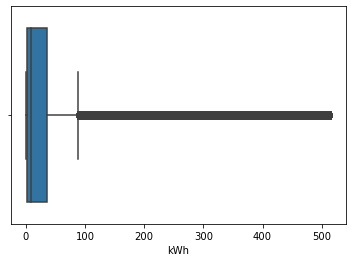

In [98]:
sns.boxplot(df['kWh'])

In [117]:
df_by_year = df.groupby(['year','month'])['kWh'].mean().reset_index()

In [118]:
df_by_year.sample(5)

,year,month,kWh
22,2017,7,51.190107
44,2019,5,43.038784
38,2018,11,17.764104
84,2022,9,40.918094
26,2017,11,9.146434


In [115]:
df_by_year.index

RangeIndex(start=0, stop=92, step=1)

In [171]:
df_by_year.iloc[4:13,0:3:1]

,year,kWh
4,2019,40.942965
5,2020,39.273573
6,2021,36.928736
7,2022,37.155023
8,2023,26.540551


In [161]:
df_by_year = df.groupby(['year'])['kWh'].mean().reset_index()

<AxesSubplot:xlabel='year'>

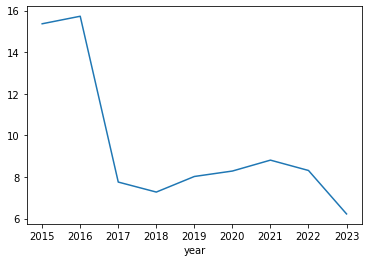

In [181]:
df.groupby(['year'])['kWh'].median().plot()

### discrete variables and continuous variables

In [183]:
data = df.copy()

In [184]:
data.head()

,name,installationDate,year,month,day,time_hour,time_min,kWh
0,Southland Leisure Centre,2015-09-01,2015,9,1,14,30,27.805
1,Southland Leisure Centre,2015-09-01,2015,9,1,15,30,30.559
2,Southland Leisure Centre,2015-09-01,2015,9,1,16,30,23.613
3,Southland Leisure Centre,2015-09-01,2015,9,1,17,30,15.257
4,Southland Leisure Centre,2015-09-01,2015,9,1,18,30,7.896


In [ ]:
# numerical variables
## 1. continuous variable and discrete variable

discrete_feature  = [
feature for feature in numerical_features if len(dataset[feature].unique
                                                 ()) <=25]
len(discrete_feature)

--aa
data = dataset.copy()
for feature in discrete_feature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()



In [196]:
discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<=5]
len(discrete_feature)

1

In [207]:
df[discrete_feature[0]].unique()

array([30,  0, 45, 15])

In [192]:
for feature in df[numerical_features]:
    print(f"{feature}\n{data[feature].unique()}\n")

year
[2015 2016 2017 2018 2019 2020 2021 2022 2023]

month
[ 9 10 11 12  1  2  3  4  5  6  7  8]

day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 22 23 24 25 26
 27 28 29 30 19 20 31]

time_hour
[14 15 16 17 18 19 20 21 22 23  0  1  2  6  7  8  9 10 11 12 13  5  3  4]

time_min
[30  0 45 15]

kWh
[ 27.805  30.559  23.613 ... 181.849 134.277  13.508]



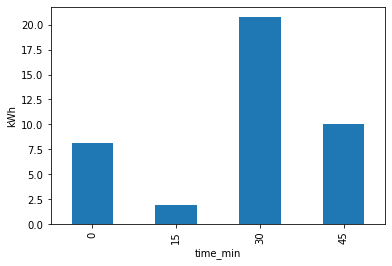

<Figure size 432x288 with 0 Axes>

In [213]:
data = df.copy()

for feature in discrete_feature:
    data.groupby(feature)['kWh'].median().plot.bar()
    plt.xlabel('time_min')
    plt.ylabel('kWh')
    plt.show()
    plt.tight_layout()

In [214]:
# continuous variable

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
len(continuous_feature)

5

In [215]:
continuous_feature

['year', 'month', 'day', 'time_hour', 'kWh']

In [227]:
data = df.copy()
for feature in continuous_feature[:-1]:
    print(data.groupby(feature)['kWh'].median())
    print('*'*60)
    

year
2015    15.3680
2016    15.7300
2017     7.7570
2018     7.2760
2019     8.0255
2020     8.2870
2021     8.8115
2022     8.3140
2023     6.2255
Name: kWh, dtype: float64
************************************************************
month
1      2.3595
2      2.6610
3      7.9770
4     11.7010
5     12.2290
6     12.8690
7     13.4540
8     12.9220
9     11.0980
10     7.5800
11     2.8090
12     1.0430
Name: kWh, dtype: float64
************************************************************
day
1     8.1200
2     7.3890
3     8.3370
4     7.5310
5     7.7300
6     8.3980
7     7.7080
8     7.1270
9     7.3430
10    7.2825
11    7.9895
12    8.4090
13    7.9415
14    8.3350
15    8.2900
16    8.3380
17    8.3885
18    7.3465
19    7.7420
20    7.9640
21    8.4630
22    8.4755
23    7.9870
24    7.4715
25    8.3460
26    8.9710
27    8.8855
28    8.7870
29    9.3620
30    9.0000
31    7.6830
Name: kWh, dtype: float64
************************************************************
time_hour

In [ ]:
df['year'], figsize = (15,15), autopct = '%1.1f%%')

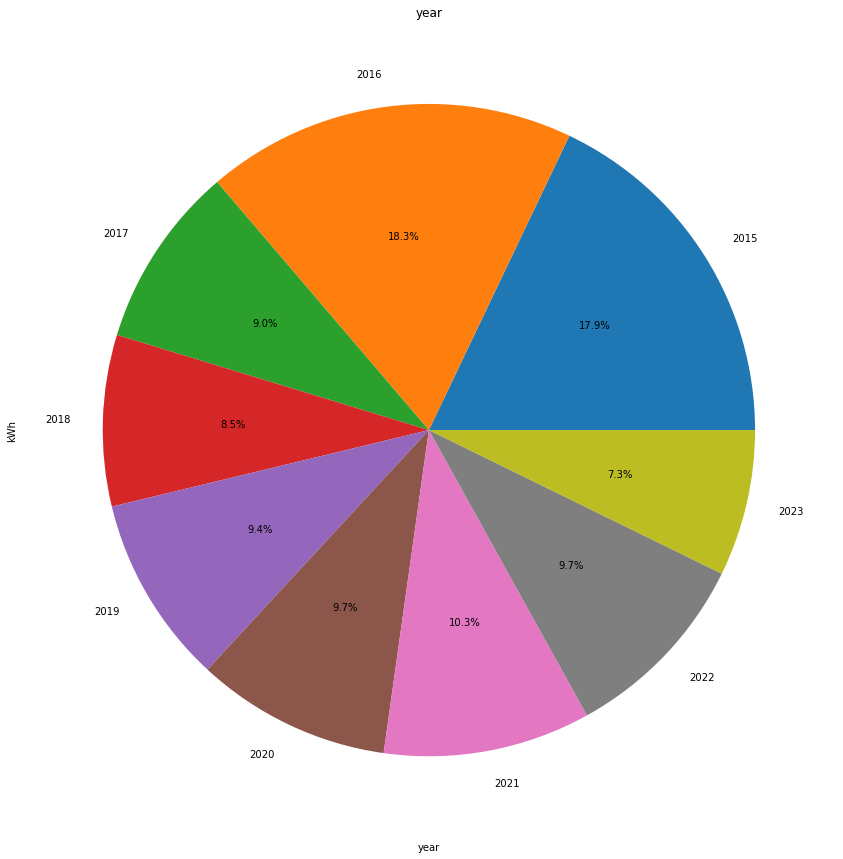

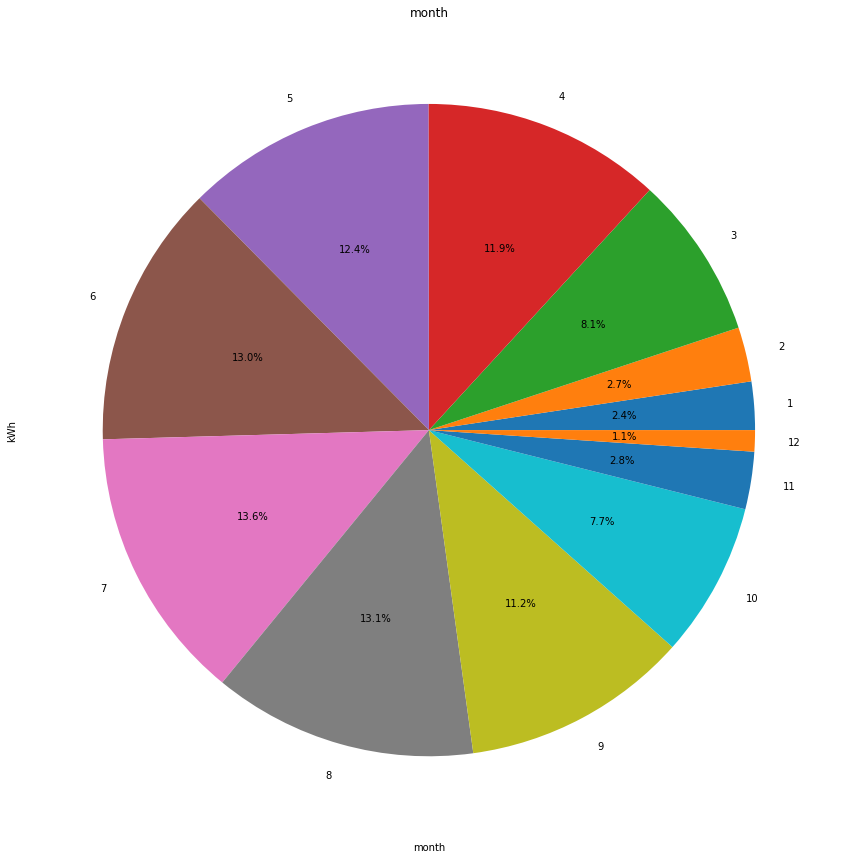

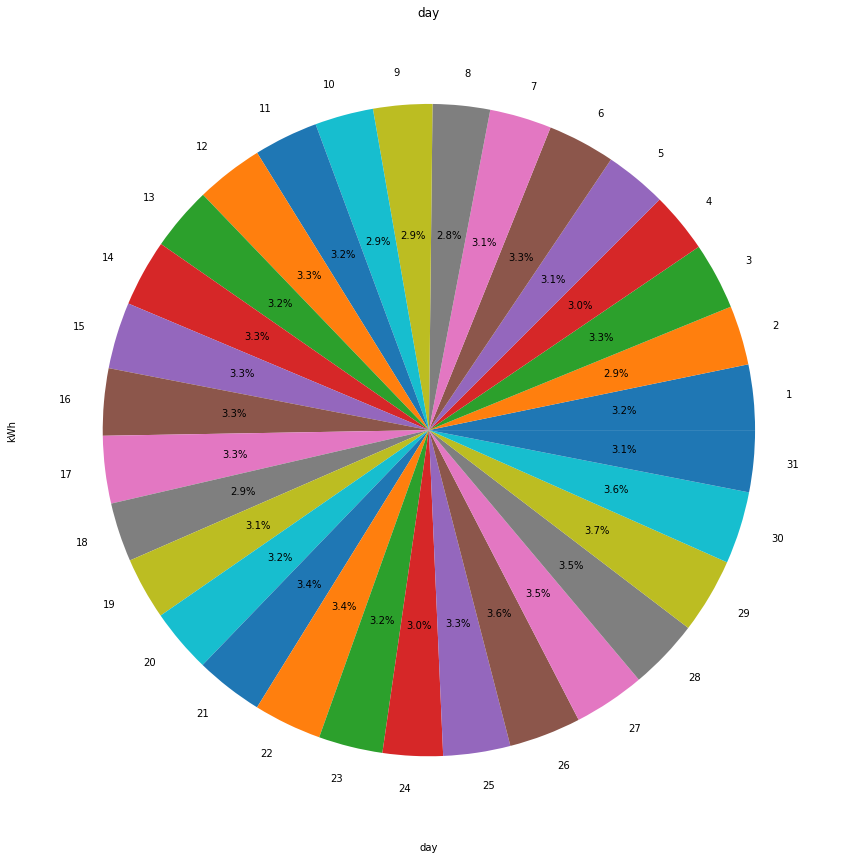

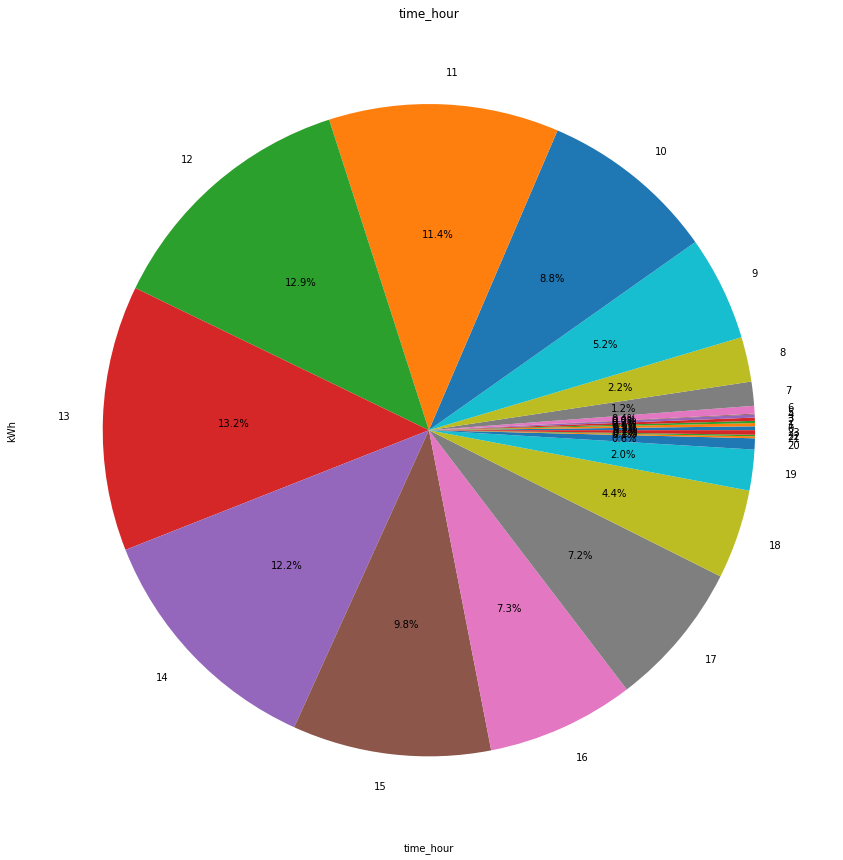

<Figure size 432x288 with 0 Axes>

In [240]:
data = df.copy()
for feature in continuous_feature[:-1]:
    data.groupby(feature)['kWh'].median().plot.pie(y = data[feature], figsize = (15,15), autopct = '%1.1f%%')
    
    plt.xlabel(feature)
    plt.ylabel('kWh')
    plt.title(feature)
    plt.show()
    plt.tight_layout()

In [238]:
# 50% of energy produced from May to august
# from 10am to 3pm --> 70% energy produced

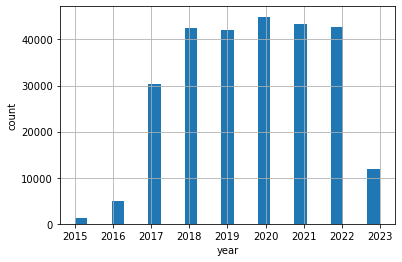

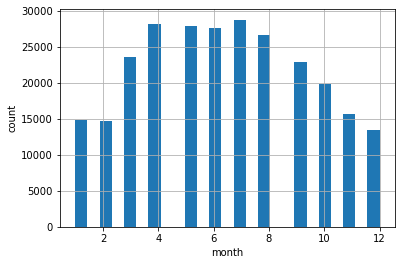

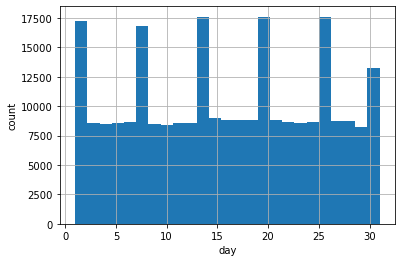

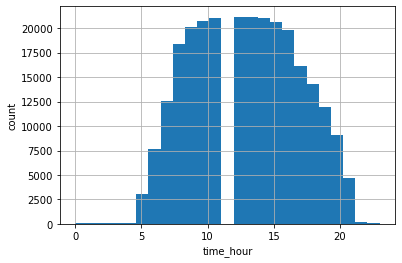

In [248]:
data = df.copy()

for feature in continuous_feature[:-1]:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

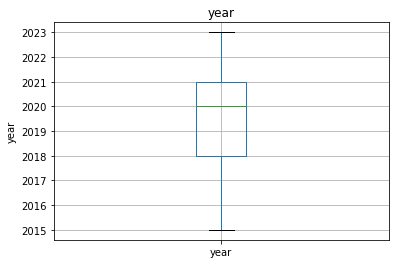

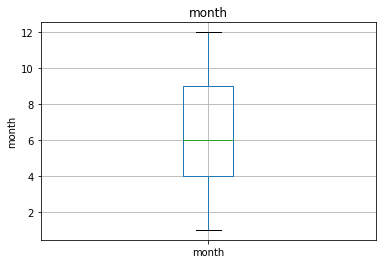

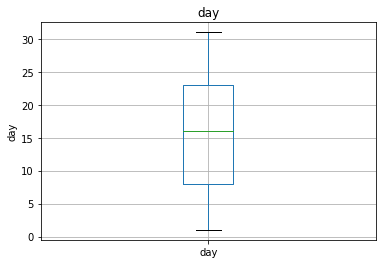

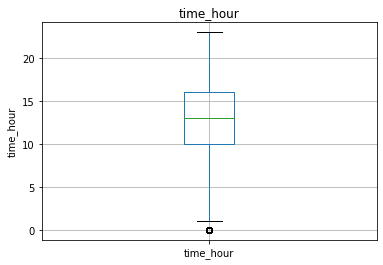

In [249]:
# outliers 

data =df.copy()

for feature in continuous_feature[:-1]:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    

<AxesSubplot:xlabel='kWh', ylabel='Count'>

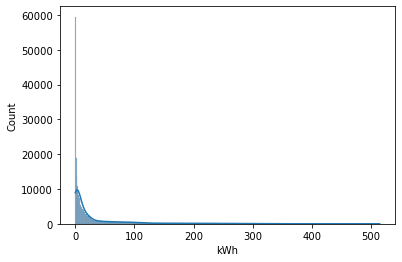

In [256]:
sns.histplot(data['kWh'], kde=True)

<AxesSubplot:>

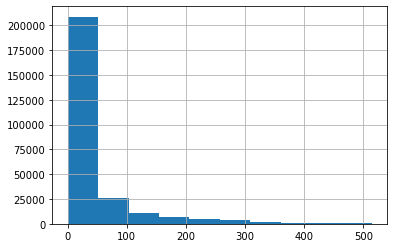

In [255]:
data['kWh'].hist()

/Users/anilreddykunta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month'>

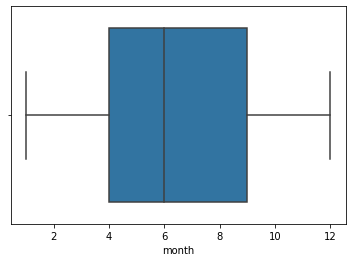

In [257]:
sns.boxplot(data['month'])

# Categorical variables

In [258]:
categorical_features

['name', 'installationDate']

In [261]:
data[categorical_features]

,name,installationDate
0,Southland Leisure Centre,2015-09-01
1,Southland Leisure Centre,2015-09-01
2,Southland Leisure Centre,2015-09-01
3,Southland Leisure Centre,2015-09-01
4,Southland Leisure Centre,2015-09-01
...,...,...
264374,Telus Spark,2017-11-27
264375,Telus Spark,2017-11-27
264376,Telus Spark,2017-11-27
264377,Telus Spark,2017-11-27


In [262]:
for feature in categorical_features:
    print(f"The feature name is '{feature}' \n and the number of unique values  are: {len(df[feature].unique())} \n")

The feature name is 'name' 
 and the number of unique values  are: 11 

The feature name is 'installationDate' 
 and the number of unique values  are: 11 



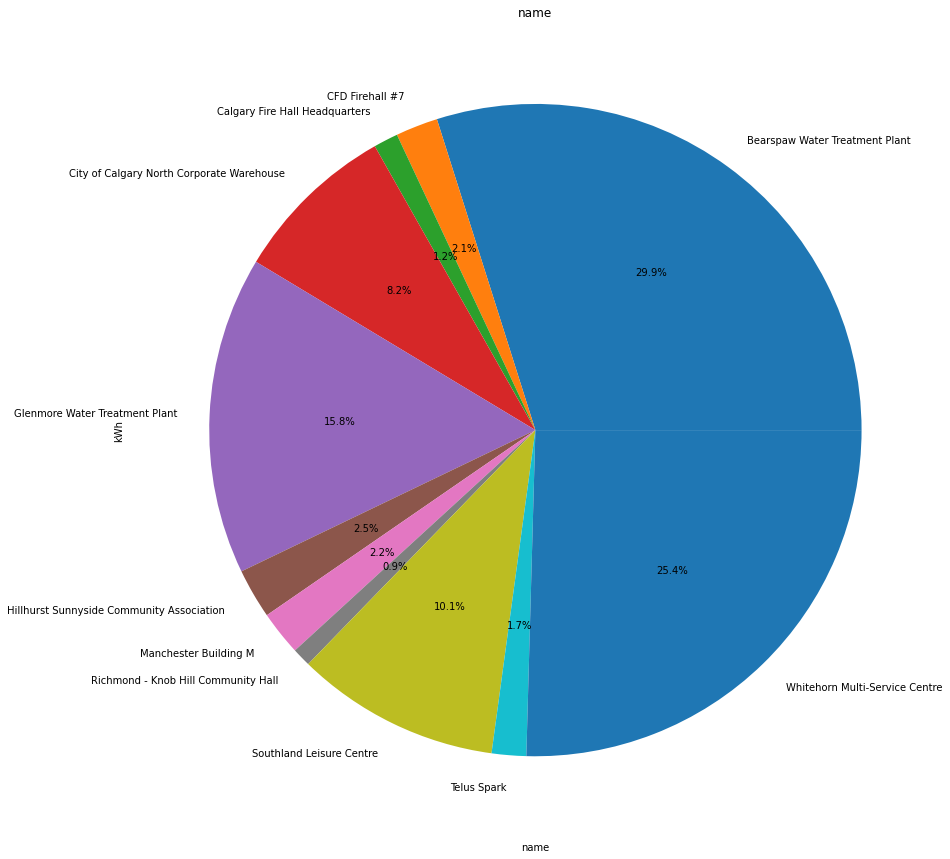

<Figure size 432x288 with 0 Axes>

In [264]:
## find the relationship b/w categorical feature and kWh
data = df.copy()
for feature in categorical_features[:-1]:
    data.groupby(feature)['kWh'].median().plot.pie(y = data[feature], figsize = (15,15), autopct = '%1.1f%%')
    
    plt.xlabel(feature)
    plt.ylabel('kWh')
    plt.title(feature)
    plt.show()
    plt.tight_layout()



In [ ]:
# 55 % of Kwh produced from Whitehorn Multi-service centre and Bearspaw water treatment plantdd

In [276]:
df['name'].value_counts()

Southland Leisure Centre                     32218
Whitehorn Multi-Service Centre               28349
City of Calgary North Corporate Warehouse    27724
Richmond - Knob Hill Community Hall          27243
Glenmore Water Treatment Plant               26324
Calgary Fire Hall Headquarters               26264
Bearspaw Water Treatment Plant               25502
Hillhurst Sunnyside Community Association    23987
CFD Firehall #7                              23287
Manchester Building M                        23164
Telus Spark                                    317
Name: name, dtype: int64

In [281]:
df['name'].value_counts().sum()

264379

In [282]:
df['name'].value_counts(normalize=True)*100

Southland Leisure Centre                     12.186293
Whitehorn Multi-Service Centre               10.722864
City of Calgary North Corporate Warehouse    10.486461
Richmond - Knob Hill Community Hall          10.304525
Glenmore Water Treatment Plant                9.956918
Calgary Fire Hall Headquarters                9.934223
Bearspaw Water Treatment Plant                9.646001
Hillhurst Sunnyside Community Association     9.072960
CFD Firehall #7                               8.808188
Manchester Building M                         8.761664
Telus Spark                                   0.119904
Name: name, dtype: float64

In [287]:
data.groupby(['name', 'installationDate'])['kWh'].sum().sort_values(ascending =False).reset_index()

,name,installationDate,kWh
0,Bearspaw Water Treatment Plant,2017-10-31,3137255.468
1,Whitehorn Multi-Service Centre,2016-12-13,2636091.515
2,Glenmore Water Treatment Plant,2017-01-11,1567049.359
3,Southland Leisure Centre,2015-09-01,1173293.844
4,City of Calgary North Corporate Warehouse,2016-12-21,793814.564
5,Hillhurst Sunnyside Community Association,2016-09-25,191935.962
6,Manchester Building M,2017-10-23,188605.876
7,CFD Firehall #7,2017-09-13,176669.672
8,Calgary Fire Hall Headquarters,2016-11-07,113768.440
9,Richmond - Knob Hill Community Hall,2016-11-21,77456.335


<AxesSubplot:xlabel='name', ylabel='count'>

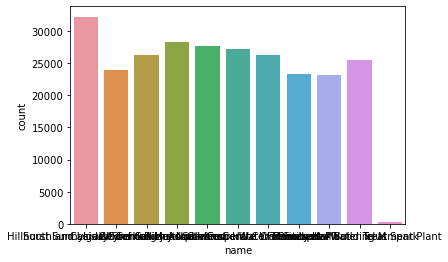

In [288]:
sns.countplot(x = df['name'])

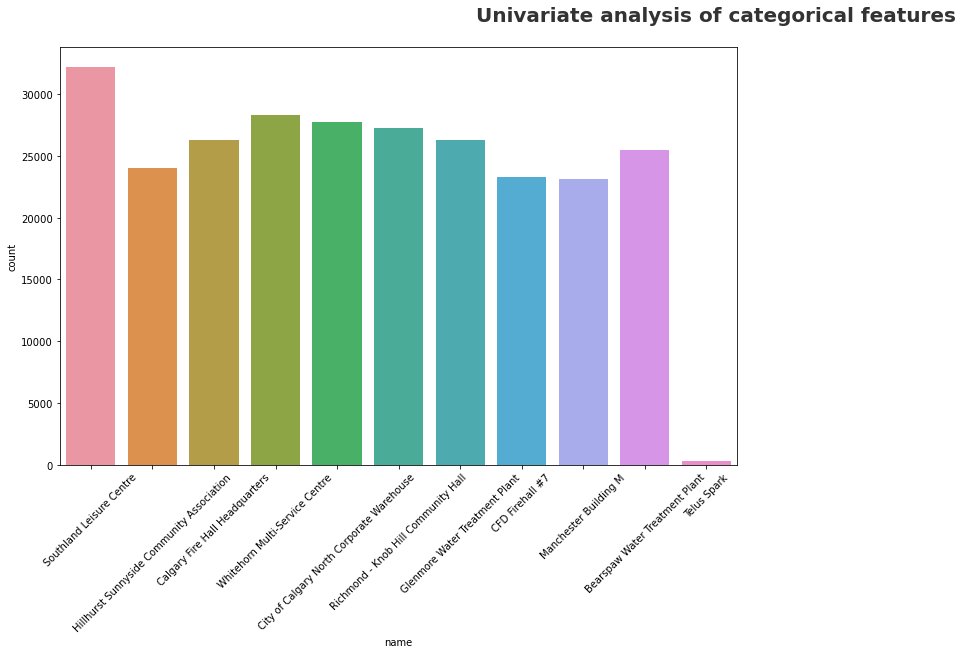

In [294]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate analysis of categorical features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y=1)
category = ['name']

for i in range(0, len(category)):
    
    plt.subplot(2,2, i+1) # size of the plot
    sns.countplot(x = df[category[i]])
    plt.xticks(rotation=45)
    plt.xlabel(category[i])
    plt.tight_layout()

In [295]:
# numeric features

In [296]:
numerical_features

['year', 'month', 'day', 'time_hour', 'time_min', 'kWh']

<AxesSubplot:xlabel='kWh', ylabel='Density'>

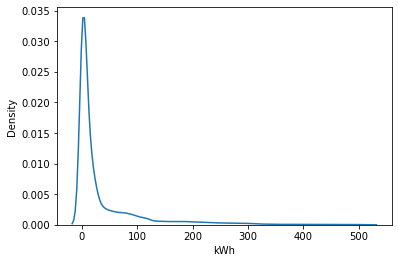

In [298]:
sns.kdeplot(df['kWh'])

(array([208669.,  25577.,  10848.,   7073.,   4921.,   3552.,   1388.,
           960.,    755.,    636.]),
 array([  0.    ,  51.4462, 102.8924, 154.3386, 205.7848, 257.231 ,
        308.6772, 360.1234, 411.5696, 463.0158, 514.462 ]),
 <BarContainer object of 10 artists>)

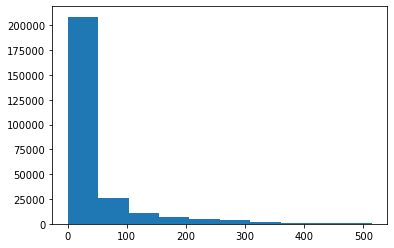

In [299]:
plt.hist(df['kWh']) # left skewed


<AxesSubplot:xlabel='kWh', ylabel='Count'>

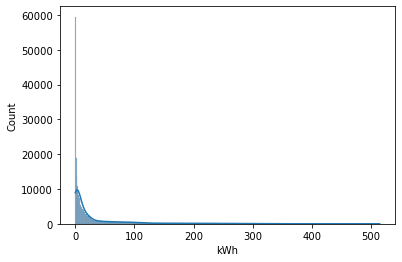

In [303]:
sns.histplot(df['kWh'], kde= True) # left skewed


/Users/anilreddykunta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kWh', ylabel='Density'>

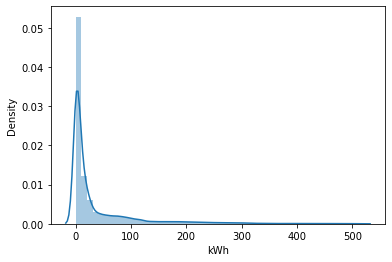

In [304]:
sns.distplot(df['kWh'])

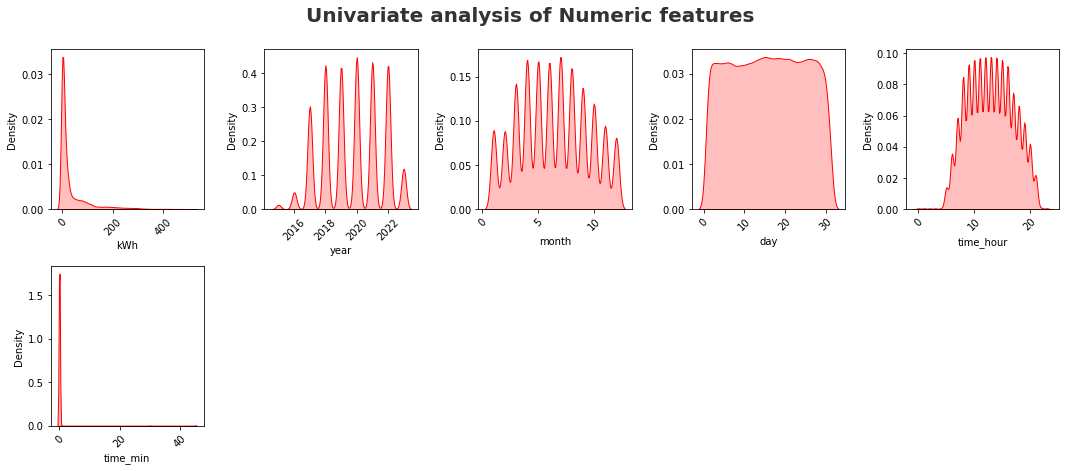

In [305]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Numeric features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y=1)
category = ['kWh','year','month','day','time_hour', 'time_min']

for i in range(0, len(category)):
    
    plt.subplot(5,5, i+1)
    sns.kdeplot(x = df[category[i]],shade=True, color='r')
    plt.xticks(rotation=45)
    plt.xlabel(category[i])
    plt.tight_layout()

# Univariate Analysis

In [ ]:
df['year'].value_counts()

In [ ]:
df['year'].value_counts().plot.pie(y=df['year'], figsize = (15,15), autopct = '%1.1f%%')

In [ ]:
df[numerical_features].head()

In [ ]:
df.head()

# bivariate analysis

In [ ]:
df.groupby(['address'])['kWh'].sum()

In [ ]:
df.groupby(['address'])['kWh'].sum().sort_values(ascending =False)

In [ ]:
df.groupby(['address','id'])['kWh'].sum().sort_values(ascending =False).reset_index()

In [ ]:
y=pd.read_csv('Solar_Energy_Production.csv')

In [ ]:
y.head()

In [ ]:
y.groupby(['name','id','address','installationDate'])['kWh'].sum().sort_values(ascending =False).reset_index()

In [ ]:
df.groupby(['month'])['kWh'].sum().sort_values(ascending =False).reset_index()

In [ ]:
df.groupby(['year'])['kWh'].sum().sort_values(ascending =False).reset_index()

In [ ]:
df.groupby(['name_Whitehorn Multi-Service Centre'])['kWh'].sum().sort_values(ascending =False).reset_index()

In [ ]:
sns.boxplot(df['kWh'])

In [ ]:
df.groupby('year')['kWh'].median().plot()

plt.xlabel('Year')
plt.ylabel('Median kWh produced')

plt.title('House price vs Yr sold')


In [ ]:
sns.barplot(x = 'kWh', y= 'year', data = df)

In [ ]:
df.head()